In [13]:
# import all necessay library
%time
import numpy as np
from numpy import linalg as LA
from functions import ClusterMerits, AuxiliarFunctions
from sklearn import preprocessing
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import norm
import matplotlib.mlab as mlab

import matplotlib.pyplot as plt
%matplotlib inline

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.2 µs


In [14]:
# load the data and little data
%time
data_path = '/home/micael/MyWorkspace/DATA'
signal = np.load(data_path+'/'+'lvbb125Matrix.npy')[0:5000,:]
signal_part = np.load(data_path+'/'+'lvbb125Matrix.npy')[0:250,:]
signal_trgt = np.ones(signal.shape[0])

ttbar = np.load(data_path+'/'+'TTbarMatrix.npy')
ttbar_part = np.load(data_path+'/'+'TTbarMatrix.npy')[0:250,:]
bkg = ttbar
bkg_trgt = np.zeros(bkg.shape[0])

data = np.append(signal,bkg,axis=0)
little_data = np.append(signal_part,ttbar_part,axis=0)
trgt = np.append(signal_trgt,bkg_trgt,axis=0)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs


In [19]:
# shuffle the little data
np.random.shuffle(little_data)

In [34]:
# distance histograms - use to estimate the sigma | better way?
variables = "j1_FracEM3,j1_FracTile0,j1_TrkWidth,j1_EMF,j1_JVF,j1_NTrk,j1_SumPtTrk,j1_Pt,j1_Eta,j1_Phi,j1_E,j1_PtRel,j2_FracEM3,j2_FracTile0,j2_TrkWidth,j2_EMF,j2_JVF,j2_NTrk,j2_SumPtTrk,j2_Pt,j2_Eta,j2_Phi,j2_E,j2_PtRel"
for variable,k in zip(variables.split(','),range(little_data.shape[1])):
    
    for i in range(little_data.shape[0]-1):
        for j in range(little_data.shape[0]):
            dist0 = little_data[i,k]-little_data[j,k]
            #dist1 = abs(little_data[i,k]-little_data[j,k])
            dataBuffer0 = np.array([dist0])
            #dataBuffer1 = np.array([dist1])
            if i==0:
                data0 = dataBuffer0
                #data1 = dataBuffer1
            else:
                data0 = np.append(data0,dataBuffer0, axis=0)
                #data1 = np.append(data1,dataBuffer1, axis=0)
            
    # best fit of data
    (mu, sigma) = norm.fit(data0)
    
    n, bins, patches = plt.hist(data0, 60, normed=1, facecolor='blue', alpha=0.75)
    # add a 'best fit' line
    y = mlab.normpdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'r', linewidth=2)
    #plt.xlim()
    #plot
    plt.xlabel('Distance')
    plt.ylabel('')
    plt.title(r'Histogram of Distances '+variable+': $\mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
    plt.grid(True)

    plt.show()

SyntaxError: invalid syntax (<ipython-input-34-08ff746841db>, line 21)

In [26]:
# random data set for testing 

n_samples=200
n_features=2
centers=[[-2,-2],[2,2]] 
cluster_std=1.0

X, y = make_blobs(n_samples, n_features, centers, cluster_std,
                  random_state=None)
#X,y

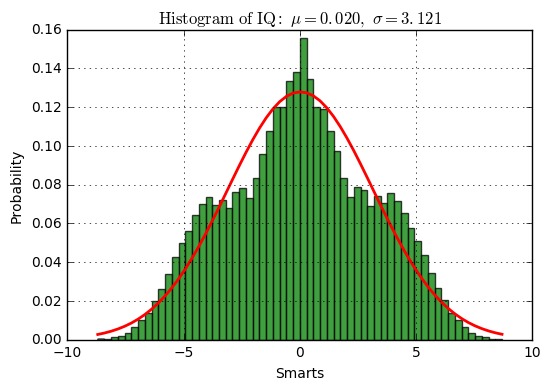

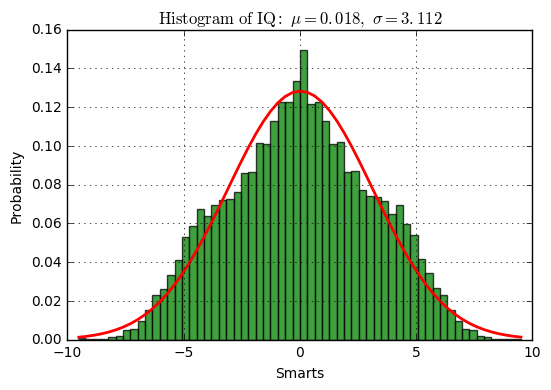

In [11]:


for k in range(X.shape[1]):
    
    for i in range(X.shape[0]-1):
        for j in range(X.shape[0]):
            dist0 = X[i,k]-X[j,k]
            dist1 = abs(X[i,k]-X[j,k])
            dataBuffer0 = np.array([dist0])
            dataBuffer1 = np.array([dist1])
            if i==0:
                data0 = dataBuffer0
                data1 = dataBuffer1
            else:
                data0 = np.append(data0,dataBuffer0, axis=0)
                data1 = np.append(data1,dataBuffer1, axis=0)
    # best fit of data
    (mu1, sigma1) = norm.fit(data0)
    
    n, bins, patches = plt.hist(data0, 60, normed=1, facecolor='green', alpha=0.75)
    # add a 'best fit' line
    y = mlab.normpdf( bins, mu1, sigma1)
    l = plt.plot(bins, y, 'r', linewidth=2)

    #plot
    plt.xlabel('Smarts')
    plt.ylabel('')
    plt.title(r'$\mathrm{Histogram\ of\ Distances:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu1, sigma1))
    plt.grid(True)

    plt.show()
    #plt.subplot(211)
    #print 'desvio padrao ', np.std(data0)
    #plt.hist(data0,bins=60)
    #plt.subplot(212)
    #plt.hist(data1,bins=60)
    #plt.show()

In [3]:
# calculate the centers using ClusterMerits

C_1 = ClusterMerits.Baricenter(X[y==0,:])
C_2 = ClusterMerits.Baricenter(X[y==1,:])

print C_1,C_2
dataSetCenters = np.zeros([len(centers),2])

for i in range(2):
    dataSetCenters[i,:] = ClusterMerits.Baricenter(X[y==i,:])
dataSetCenters

[-2.00007649 -1.97295746] [ 1.90301893  1.86523166]


array([[-2.00007649, -1.97295746],
       [ 1.90301893,  1.86523166]])

In [25]:
# create a sinapses array 

sins = np.array([[-4.342,  -3.433 ],[4.465,  3.456]])

sins

array([[-4.342, -3.433],
       [ 4.465,  3.456]])

In [30]:
# this training works

for ievent in range(X.shape[0]):
    #print '----------------------------------------'
    #print sinapses[y[ievent],:]
    sinapses[y[ievent],:] = sinapses[y[ievent],:] + 0.1*(X[ievent,:]-sinapses[y[ievent],:])
    #print sinapses[y[ievent],:]
    #print '----------------------------------------'
sinapses

array([[-2.49927781, -2.18144969],
       [ 1.92731797,  2.1639568 ]])

In [9]:
# this functions works too
sinapses = sins
def update_sinapses(sinapse_id,event,train_parameter):
    sinapses[sinapse_id,:] = (sinapses[sinapse_id,:]+train_parameter*(event-sinapses[sinapse_id,:]))
    

for ievent in range(X.shape[0]):
    update_sinapses(y[ievent],X[ievent,:],0.1)


sinapses

array([[-2.24341215, -1.91907886],
       [ 2.20222139,  1.82902096]])

In [27]:
# try to use the SupervisedKohonen 

from functions import SupervisedKohonen

train_params = SupervisedKohonen.TrainParameters()

train_params.learning_rate = 0.1

knn = SupervisedKohonen.KohonenNN()



In [28]:
knn.fit(X[0:150,:],y[0:150],trn_params=train_params,sinapses=sins)

Supervised Kohonen NN TrainParameters
Learning Rate: 0.10000
Verbose: False
Number of events: 150


array([[-1.8969097 , -2.19287615],
       [ 1.5309489 ,  1.74329355]])

In [10]:
knn.sinapses

array([[-2.11790024, -1.9967277 ],
       [ 2.39270077,  2.13480087]])

In [8]:
#sins2 = np.repeat(sins,2,axis=0)

proxTrnSins = np.repeat(knn.sinapses,2,axis=0)
#print proxTrnSins
#print '====================================='
for i in range(proxTrnSins.shape[0]):
    if i % 2 ==0:
        proxTrnSins[i,:] = proxTrnSins[i,:]+np.array([0.1,0.1])
    else:
        proxTrnSins[i,:] = proxTrnSins[i,:]-np.array([0.1,0.1])
#print proxTrnSins

kTrnSins = np.repeat(proxTrnSins,2,axis=0)
kTrnSins.shape

(8, 2)

In [29]:
predict = knn.predict(X[151:,:])

In [32]:
y[151:] - predict

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [33]:
from sklearn.metrics import mean_squared_error

mean_squared_error(predict, y[151:])

0.0